In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix 

df =  pd.read_csv('heart.csv')

X = df.drop('output' , axis = 1)
y= df['output']

X_train, X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 ,random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter = 2000)
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

print (confusion_matrix(y_test , y_pred))
print(classification_report(y_test , y_pred))

[[25  4]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



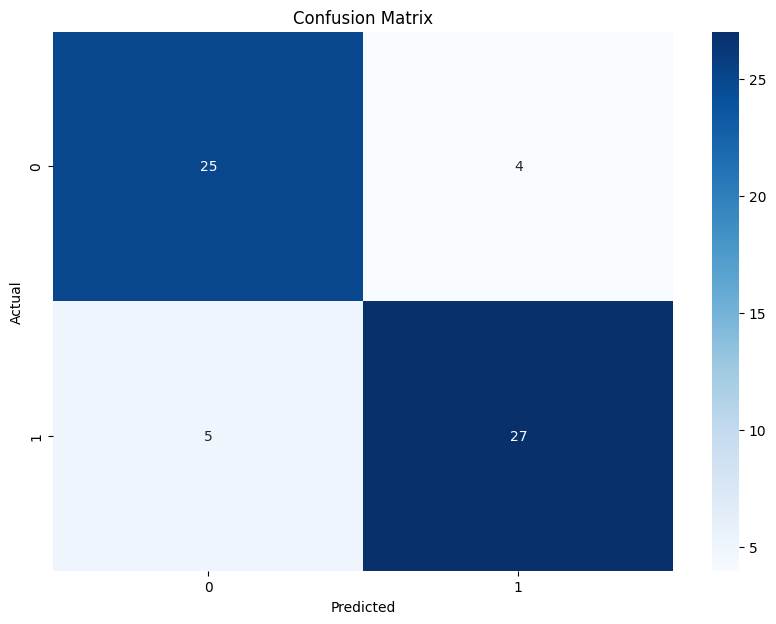

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,7))
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test , y_pred) , annot = True, fmt = 'd' , cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [4]:
from sklearn.metrics import roc_curve , roc_auc_score

y_prob = model.predict_proba(X_test)[:,1]

fpr , tpc , thresholds = roc_curve(y_test , y_prob)

auc = roc_auc_score(y_test , y_prob)

print("AUC:" , auc)


AUC: 0.9267241379310345


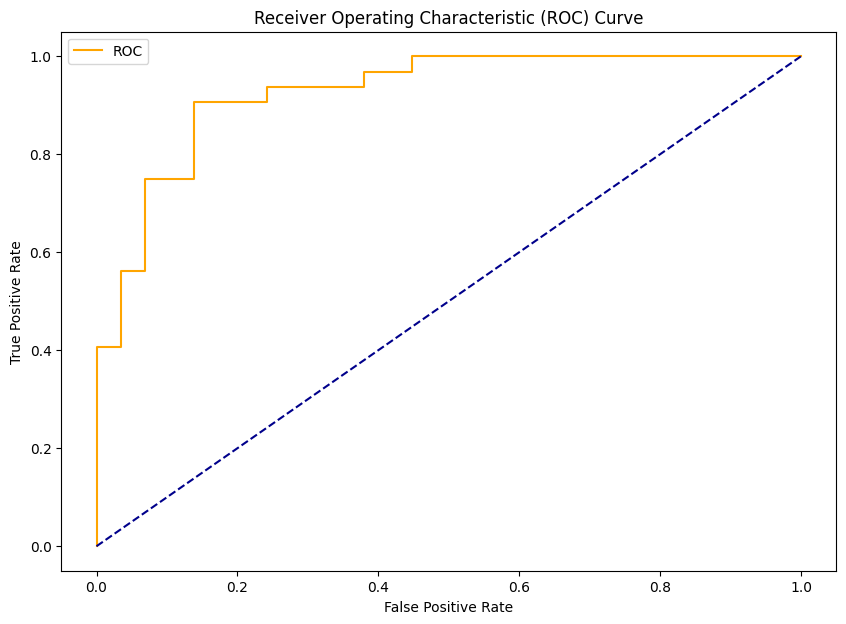

In [5]:
plt.figure = plt.figure(figsize = (10,7))
plt.plot(fpr , tpc , color = 'orange' , label = 'ROC')
plt.plot([0,1] , [0,1] , color = 'darkblue' , linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [6]:
from sklearn.neighbors import KNeighborsClassifier

k_values = list(range(1,26))
result = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train , y_train)
    y_pred = knn.predict(X_test)
    result.append((k , classification_report(y_test , y_pred , output_dict = True)['accuracy']))
    print(f'K={k} , Accuracy = {result[-1][1]}')

K=1 , Accuracy = 0.8524590163934426
K=2 , Accuracy = 0.819672131147541
K=3 , Accuracy = 0.8524590163934426
K=4 , Accuracy = 0.8524590163934426
K=5 , Accuracy = 0.9016393442622951
K=6 , Accuracy = 0.9016393442622951
K=7 , Accuracy = 0.9180327868852459
K=8 , Accuracy = 0.8688524590163934
K=9 , Accuracy = 0.9016393442622951
K=10 , Accuracy = 0.8852459016393442
K=11 , Accuracy = 0.8852459016393442
K=12 , Accuracy = 0.8688524590163934
K=13 , Accuracy = 0.8852459016393442
K=14 , Accuracy = 0.8688524590163934
K=15 , Accuracy = 0.8688524590163934
K=16 , Accuracy = 0.8852459016393442
K=17 , Accuracy = 0.8852459016393442
K=18 , Accuracy = 0.9016393442622951
K=19 , Accuracy = 0.8852459016393442
K=20 , Accuracy = 0.9016393442622951
K=21 , Accuracy = 0.8852459016393442
K=22 , Accuracy = 0.8852459016393442
K=23 , Accuracy = 0.8852459016393442
K=24 , Accuracy = 0.8852459016393442
K=25 , Accuracy = 0.8852459016393442


In [9]:
df_results = pd.DataFrame(result, columns=["k", "Accuracy"])
print(df_results)

     k  Accuracy
0    1  0.852459
1    2  0.819672
2    3  0.852459
3    4  0.852459
4    5  0.901639
5    6  0.901639
6    7  0.918033
7    8  0.868852
8    9  0.901639
9   10  0.885246
10  11  0.885246
11  12  0.868852
12  13  0.885246
13  14  0.868852
14  15  0.868852
15  16  0.885246
16  17  0.885246
17  18  0.901639
18  19  0.885246
19  20  0.901639
20  21  0.885246
21  22  0.885246
22  23  0.885246
23  24  0.885246
24  25  0.885246


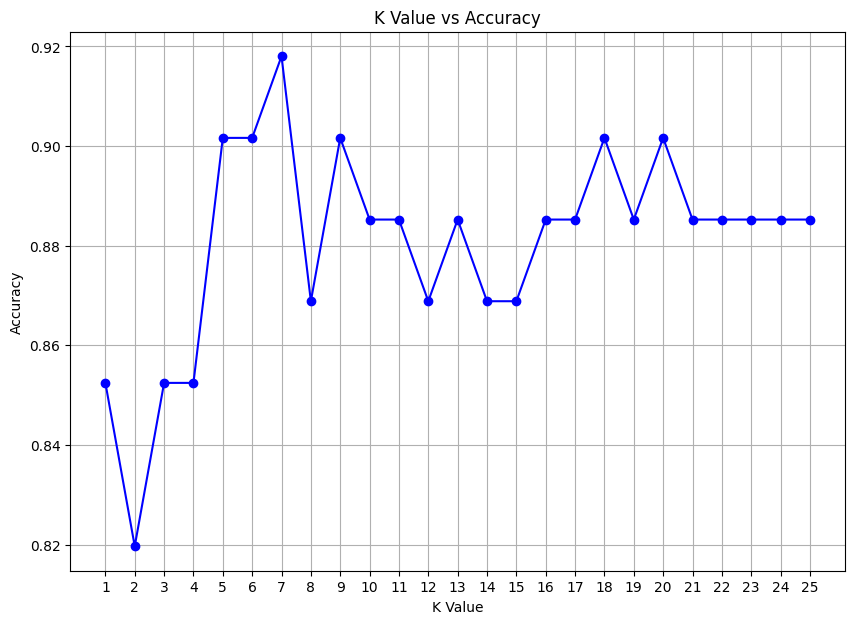

In [19]:
import importlib
import matplotlib
importlib.reload(matplotlib.pyplot)
plt.figure(figsize=(10,7))
plt.plot(df_results["k"], df_results["Accuracy"], marker='o', linestyle='-', color='b')
plt.title('K Value vs Accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [20]:
roc_auc_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train , y_train)
    y_prob = knn.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test , y_prob)
    roc_auc_scores.append((k,auc))
    print(f'k = {k} , Auc = {auc}')

k = 1 , Auc = 0.8545258620689655
k = 2 , Auc = 0.8830818965517242
k = 3 , Auc = 0.8976293103448276
k = 4 , Auc = 0.9143318965517242
k = 5 , Auc = 0.9154094827586208
k = 6 , Auc = 0.9110991379310345
k = 7 , Auc = 0.9326508620689655
k = 8 , Auc = 0.9261853448275861
k = 9 , Auc = 0.919719827586207
k = 10 , Auc = 0.9207974137931034
k = 11 , Auc = 0.9143318965517242
k = 12 , Auc = 0.9035560344827587
k = 13 , Auc = 0.9078663793103448
k = 14 , Auc = 0.9164870689655172
k = 15 , Auc = 0.912176724137931
k = 16 , Auc = 0.9057112068965516
k = 17 , Auc = 0.9067887931034484
k = 18 , Auc = 0.9078663793103448
k = 19 , Auc = 0.9094827586206896
k = 20 , Auc = 0.90625
k = 21 , Auc = 0.9019396551724137
k = 22 , Auc = 0.9014008620689655
k = 23 , Auc = 0.8976293103448276
k = 24 , Auc = 0.8960129310344828
k = 25 , Auc = 0.8938577586206896
